In [1]:
%cd ../../../../

/home/users/dmoreno2016/ASTROMER/astromer_pe_main/astromer/presentation/experiments/astromer_1_pe


In [2]:
import matplotlib.pyplot as plt
import pandas as pd
import numpy as np

import glob
import toml
import os

os.environ["CUDA_VISIBLE_DEVICES"] = '-1'

In [3]:
pretraining_path = 'results/pretraining/P02R01/pretrained_weights'
finetuning_path = 'results/finetuning/P02R01/pretrained_weights'

datasets_names = ['alcock', 'atlas', 'ogle']
subsets = [500]
folds = [0, 1, 2]

In [4]:
#datasets_names = ['kepler', 'kepler_alcock_linear', 'kepler_atlas_linear', 'kepler_ogle_linear']
#subsets = ['all']

datasets_names = ['alcock', 'atlas', 'ogle', 'kepler', 'kepler_alcock_linear', 'kepler_atlas_linear', 'kepler_ogle_linear']
datasets_names = ['kepler']
subsets = [50]

In [5]:
## Pretraining metrics
dict_logs_pretraining = dict()

for subset_name in subsets:
    if subset_name != 'all':
        path_metrics = os.path.join(pretraining_path, 'test_metrics_datasets_{}.toml'.format(subset_name))
    else:
        path_metrics = os.path.join(pretraining_path, 'test_metrics_datasets.toml')

    with open(path_metrics, 'r') as f:
        dict_logs_pretraining['{}'.format(subset_name)] = toml.load(f)

In [6]:
dict_logs_pretraining

{'50': {'alcock': {'fold_0': {'loss': 0.14031149446964264,
    'r_square': 0.6564893126487732,
    'rmse': 0.14031149446964264},
   'fold_1': {'loss': 0.11284921318292618,
    'r_square': 0.7324299812316895,
    'rmse': 0.11284921318292618},
   'fold_2': {'loss': 0.12499890476465225,
    'r_square': 0.7280089855194092,
    'rmse': 0.12499890476465225}},
  'ogle': {'fold_0': {'loss': 0.11726763099431992,
    'r_square': 0.7246230244636536,
    'rmse': 0.11726763099431992},
   'fold_1': {'loss': 0.11327280104160309,
    'r_square': 0.7304368615150452,
    'rmse': 0.11327280104160309},
   'fold_2': {'loss': 0.12479430437088013,
    'r_square': 0.7144362926483154,
    'rmse': 0.12479430437088013}},
  'atlas': {'fold_0': {'loss': 0.19198021292686462,
    'r_square': 0.6136759519577026,
    'rmse': 0.19198021292686462},
   'fold_1': {'loss': 0.18551695346832275,
    'r_square': 0.6032215356826782,
    'rmse': 0.18551695346832275},
   'fold_2': {'loss': 0.19646713137626648,
    'r_square': 0.

In [7]:
dict_pt_metrics_normal = {
    'r2': [],
    'rmse': [],
    'time_epoch': [],
    'time_batch': [],
}

In [8]:
for subset in subsets:
    df_r2, df_rmse, df_time_epoch, df_time_batch = [], [], [], []
    for ds_name in datasets_names:            
        
        list_r2, list_rmse, list_time_epoch, list_time_batch = [], [], [], []
        for fold in folds:
            list_r2.append(dict_logs_pretraining['{}'.format(subset)][ds_name]['fold_{}'.format(fold)]['r_square'])
            list_rmse.append(dict_logs_pretraining['{}'.format(subset)][ds_name]['fold_{}'.format(fold)]['rmse'])
            list_time_epoch.append(0)
            list_time_batch.append(0)
            
        df_r2.append(pd.DataFrame({ds_name: list_r2}))
        df_rmse.append(pd.DataFrame({ds_name: list_rmse}))
        df_time_epoch.append(pd.DataFrame({ds_name: list_time_epoch}))
        df_time_batch.append(pd.DataFrame({ds_name: list_time_batch}))

    dict_pt_metrics_normal['r2'] = pd.concat(df_r2, axis=1)
    dict_pt_metrics_normal['rmse'] = pd.concat(df_rmse, axis=1)
    dict_pt_metrics_normal['time_epoch'] = pd.concat(df_time_epoch, axis=1)
    dict_pt_metrics_normal['time_batch'] = pd.concat(df_time_batch, axis=1)

In [9]:
for metric_name, dict_results in dict_pt_metrics_normal.items():
    dict_results['fold'] = folds
    dict_results['Trainable layers'] = ['Without FT' for _ in folds]
    dict_results['lr'] = ['direct' for _ in folds]
    dict_pt_metrics_normal['{}'.format(metric_name)] = dict_results

In [10]:
dict_pt_metrics_normal['r2']

,kepler,fold,Trainable layers,lr
0,-2.268909,0,Without FT,direct
1,-2.262428,1,Without FT,direct
2,-2.281277,2,Without FT,direct


In [11]:
dict_pt_metrics_normal['rmse']

,kepler,fold,Trainable layers,lr
0,0.065955,0,Without FT,direct
1,0.065890,1,Without FT,direct
2,0.065952,2,Without FT,direct


In [12]:
## Pretraining metrics
dict_logs_pretraining = dict()

for subset_name in subsets:
    if subset_name != 'all':
        path_metrics = os.path.join(pretraining_path, 'test_metrics_datasets_{}_multiply_mean_v1.toml'.format(subset_name))
    else:
        path_metrics = os.path.join(pretraining_path, 'test_metrics_datasets.toml')

    with open(path_metrics, 'r') as f:
        dict_logs_pretraining['{}'.format(subset_name)] = toml.load(f)

dict_pt_metrics_corr = {
    'r2': [],
    'rmse': [],
    'time_epoch': [],
    'time_batch': [],
}

for subset in subsets:
    df_r2, df_rmse, df_time_epoch, df_time_batch = [], [], [], []
    for ds_name in datasets_names:            
        
        list_r2, list_rmse, list_time_epoch, list_time_batch = [], [], [], []
        for fold in folds:
            list_r2.append(dict_logs_pretraining['{}'.format(subset)][ds_name]['fold_{}'.format(fold)]['r_square'])
            list_rmse.append(dict_logs_pretraining['{}'.format(subset)][ds_name]['fold_{}'.format(fold)]['rmse'])
            list_time_epoch.append(0)
            list_time_batch.append(0)
            
        df_r2.append(pd.DataFrame({ds_name: list_r2}))
        df_rmse.append(pd.DataFrame({ds_name: list_rmse}))
        df_time_epoch.append(pd.DataFrame({ds_name: list_time_epoch}))
        df_time_batch.append(pd.DataFrame({ds_name: list_time_batch}))

    dict_pt_metrics_corr['r2'] = pd.concat(df_r2, axis=1)
    dict_pt_metrics_corr['rmse'] = pd.concat(df_rmse, axis=1)
    dict_pt_metrics_corr['time_epoch'] = pd.concat(df_time_epoch, axis=1)
    dict_pt_metrics_corr['time_batch'] = pd.concat(df_time_batch, axis=1)

for metric_name, dict_results in dict_pt_metrics_corr.items():
    dict_results['fold'] = folds
    dict_results['Trainable layers'] = ['Without FT' for _ in folds]
    dict_results['lr'] = ['correction' for _ in folds]
    dict_pt_metrics_corr['{}'.format(metric_name)] = dict_results

In [13]:
dict_pt_metrics_corr['r2']

,kepler,fold,Trainable layers,lr
0,0.456651,0,Without FT,correction
1,0.458277,1,Without FT,correction
2,0.459228,2,Without FT,correction


In [14]:
dict_pt_metrics = dict()
for key in dict_pt_metrics_normal.keys():
    dict_pt_metrics[key] = pd.concat([dict_pt_metrics_normal[key], dict_pt_metrics_corr[key]]) 

In [15]:
dict_pt_metrics.keys()

dict_keys(['r2', 'rmse', 'time_epoch', 'time_batch'])

In [16]:
dict_pt_metrics['r2']

,kepler,fold,Trainable layers,lr
0,-2.268909,0,Without FT,direct
1,-2.262428,1,Without FT,direct
2,-2.281277,2,Without FT,direct
0,0.456651,0,Without FT,correction
1,0.458277,1,Without FT,correction
2,0.459228,2,Without FT,correction


## Extract finetuning metrics

In [17]:
## Finetuning metrics

dict_logs_finetuning = dict()
for path_lr_files in glob.glob('{}/*'.format(finetuning_path)):
    lr = path_lr_files.split('/')[-1]

    if lr not in ['lr_1e-8_pe_by_mean', 'lr_1e-6_pe_by_mean']:

        dict_logs_finetuning[lr] = dict()
        for path_science_cases in glob.glob('{}/*'.format(path_lr_files)):

            spc = path_science_cases.split('/')[-1]

            #if spc in ['PE']:

            dict_logs_finetuning[lr][spc] = dict()
            for path_ds_name in glob.glob('{}/*'.format(path_science_cases)):
                ds_name = path_ds_name.split('/')[-1]

                if ds_name in datasets_names:

                    dict_logs_finetuning[lr][spc][ds_name] = dict()
                    for path_fold in glob.glob('{}/*'.format(path_ds_name)):
                        fold_name = path_fold.split('/')[-1]

                        dict_logs_finetuning[lr][spc][ds_name][fold_name] = dict()

                        for path_subsets in glob.glob('{}/*'.format(path_fold)):
                            subset_name = path_subsets.split('/')[-1]

                            #if subset_name.split('_')[-1] in subsets:
                            
                            with open(os.path.join(path_subsets, 'metrics.toml'), 'r') as f:
                                metrics = toml.load(f)

                            dict_logs_finetuning[lr][spc][ds_name][fold_name][subset_name] = dict()
                            #for files in ['metrics', 'time_epoch', 'time_batch']:
                            dict_logs_finetuning[lr][spc][ds_name][fold_name][subset_name]['metrics'] = metrics
                            dict_logs_finetuning[lr][spc][ds_name][fold_name][subset_name]['time_batch'] = pd.read_csv(os.path.join(path_subsets, 'time_batch.csv'))
                            dict_logs_finetuning[lr][spc][ds_name][fold_name][subset_name]['time_epoch'] = pd.read_csv(os.path.join(path_subsets, 'time_epoch.csv'))


In [18]:
dict_ft_metrics = dict()

for path_lr_files in glob.glob('{}/*'.format(finetuning_path)):
    lr = path_lr_files.split('/')[-1]

    if lr not in ['lr_1e-6_pe_by_mean', 'lr_1e-8_pe_by_mean']:  

        #if lr.find('pe_by_mean') != -1:
        #    lr = '{}_corr'.format(lr)
        #else:
        #    lr = '{}_direct'.format(lr)
        
        dict_ft_metrics[lr] = {
            'r2': [],
            'rmse': [],
            'time_epoch': [],
            'time_batch': [],
        }

        for subset in subsets:

            for i, idx_name in enumerate(list(dict_logs_finetuning[lr].keys())):

                df_r2, df_rmse, df_time_epoch, df_time_batch = [], [], [], []
                for ds_name in datasets_names:            

                    list_r2, list_rmse, list_time_epoch, list_time_batch = [], [], [], []
                    for fold in folds:
                        try:

                            if subset != 'all':
                                list_r2.append(dict_logs_finetuning[lr][idx_name][ds_name]['fold_{}'.format(fold)]['{}_{}'.format(ds_name, subset)]['metrics']['test_r_square'])
                                list_rmse.append(dict_logs_finetuning[lr][idx_name][ds_name]['fold_{}'.format(fold)]['{}_{}'.format(ds_name, subset)]['metrics']['test_rmse'])
                                list_time_epoch.append(dict_logs_finetuning[lr][idx_name][ds_name]['fold_{}'.format(fold)]['{}_{}'.format(ds_name, subset)]['time_epoch'].time_epoch.values.sum())
                                list_time_batch.append(dict_logs_finetuning[lr][idx_name][ds_name]['fold_{}'.format(fold)]['{}_{}'.format(ds_name, subset)]['time_batch'].time_batch.values.sum())

                            else:
                                list_r2.append(dict_logs_finetuning[lr][idx_name][ds_name]['fold_{}'.format(fold)]['{}'.format(ds_name)]['metrics']['test_r_square'])
                                list_rmse.append(dict_logs_finetuning[lr][idx_name][ds_name]['fold_{}'.format(fold)]['{}'.format(ds_name)]['metrics']['test_rmse'])
                                list_time_epoch.append(dict_logs_finetuning[lr][idx_name][ds_name]['fold_{}'.format(fold)]['{}'.format(ds_name)]['time_epoch'].time_epoch.values.sum())
                                list_time_batch.append(dict_logs_finetuning[lr][idx_name][ds_name]['fold_{}'.format(fold)]['{}'.format(ds_name)]['time_batch'].time_batch.values.sum())

                        except: 
                            print('We do not have fold {} ({})'.format(fold, ds_name))
                            
                    df_r2.append(pd.DataFrame({ds_name: list_r2}))
                    df_rmse.append(pd.DataFrame({ds_name: list_rmse}))
                    df_time_epoch.append(pd.DataFrame({ds_name: list_time_epoch}))
                    df_time_batch.append(pd.DataFrame({ds_name: list_time_batch}))

                dict_ft_metrics[lr]['r2'].append(pd.concat(df_r2, axis=1))
                dict_ft_metrics[lr]['rmse'].append(pd.concat(df_rmse, axis=1))
                dict_ft_metrics[lr]['time_epoch'].append(pd.concat(df_time_epoch, axis=1))
                dict_ft_metrics[lr]['time_batch'].append(pd.concat(df_time_batch, axis=1))

                for metric_name, dict_results in dict_ft_metrics[lr].items():
                    dict_results[i]['fold'] = folds
                    dict_results[i]['Trainable layers'] = ['{}'.format(idx_name) for _ in folds]
                    dict_ft_metrics[lr]['{}'.format(metric_name)][i] = dict_results[i]
                
            for metric_name, _ in dict_ft_metrics[lr].items():
                dict_ft_metrics[lr][metric_name] = pd.concat(dict_ft_metrics[lr][metric_name])


In [19]:
for path_lr_files in glob.glob('{}/*'.format(finetuning_path)):
    lr = path_lr_files.split('/')[-1]

    if lr not in ['lr_1e-6_pe_by_mean', 'lr_1e-8_pe_by_mean']:  
        
        dict_ft_metrics[lr]['r2']['lr'] = lr # '_'.join(lr.split('_')[:2])
        dict_ft_metrics[lr]['rmse']['lr'] = lr # '_'.join(lr.split('_')[:2])
        dict_ft_metrics[lr]['time_epoch']['lr'] = lr # '_'.join(lr.split('_')[:2])
        dict_ft_metrics[lr]['time_batch']['lr'] = lr # '_'.join(lr.split('_')[:2])

In [20]:
dict_ft_metrics.keys()

dict_keys(['lr_1e-15_pe_by_mean', 'lr_1e-10_pe_by_mean', 'lr_scheduler', 'lr_scheduler_pe_by_mean', 'lr_1e-7_pe_by_mean', 'lr_1e-5_pe_by_mean', 'lr_1e-13_pe_by_mean', 'lr_1e-3_pe_by_mean'])

In [21]:
dict_ft_metrics['lr_1e-15_pe_by_mean']['r2']

,alcock,atlas,ogle,kepler,kepler_alcock_linear,kepler_atlas_linear,kepler_ogle_linear,fold,Trainable layers,lr
0,0.670935,0.531853,0.711677,-1.023767,0.676337,0.631345,0.667263,0,PE,lr_1e-15_pe_by_mean
1,0.731879,0.532010,0.715976,-1.022288,0.649174,0.634015,0.642729,1,PE,lr_1e-15_pe_by_mean
2,0.720197,0.520383,0.705296,-1.015004,0.676328,0.613544,0.675014,2,PE,lr_1e-15_pe_by_mean


## RMSE v/s Finetuning time

In [22]:
import seaborn as sns

In [23]:
dict_pt_metrics['r2']

,alcock,atlas,ogle,kepler,kepler_alcock_linear,kepler_atlas_linear,kepler_ogle_linear,fold,Trainable layers,lr
0,0.656489,0.613676,0.724623,-2.268909,0.684994,0.608667,0.669379,0,Without FT,direct
1,0.732430,0.603222,0.730437,-2.262428,0.673177,0.633230,0.663349,1,Without FT,direct
2,0.728009,0.587714,0.714436,-2.281277,0.682426,0.630392,0.653135,2,Without FT,direct
0,0.644710,0.592113,0.720503,0.456651,0.674166,0.622428,0.641412,0,Without FT,correction
1,0.735943,0.591662,0.724215,0.458277,0.656281,0.628689,0.670759,1,Without FT,correction
2,0.732545,0.562295,0.706572,0.459228,0.683266,0.623305,0.652573,2,Without FT,correction


In [25]:
dict_ft_metrics['lr_1e-15_pe_by_mean'].keys()

dict_keys(['r2', 'rmse', 'time_epoch', 'time_batch'])

In [26]:
dict_ft_metrics_concat = {
            'r2': [],
            'rmse': [],
            'time_epoch': [],
            'time_batch': [],
        }

In [27]:
for key, df_value in dict_ft_metrics.items():
    dict_ft_metrics_concat['r2'].append(df_value['r2'])
    dict_ft_metrics_concat['rmse'].append(df_value['rmse'])
    dict_ft_metrics_concat['time_epoch'].append(df_value['time_epoch'])
    dict_ft_metrics_concat['time_batch'].append(df_value['time_batch'])

dict_ft_metrics_concat['r2'] = pd.concat(dict_ft_metrics_concat['r2'])
dict_ft_metrics_concat['rmse'] = pd.concat(dict_ft_metrics_concat['rmse'])
dict_ft_metrics_concat['time_epoch'] = pd.concat(dict_ft_metrics_concat['time_epoch'])
dict_ft_metrics_concat['time_batch'] = pd.concat(dict_ft_metrics_concat['time_batch'])

In [28]:
dict_ft_metrics_concat['r2']

,alcock,atlas,ogle,kepler,kepler_alcock_linear,kepler_atlas_linear,kepler_ogle_linear,fold,Trainable layers,lr
0,0.670935,0.531853,0.711677,-1.023767,0.676337,0.631345,0.667263,0,PE,lr_1e-15_pe_by_mean
1,0.731879,0.532010,0.715976,-1.022288,0.649174,0.634015,0.642729,1,PE,lr_1e-15_pe_by_mean
2,0.720197,0.520383,0.705296,-1.015004,0.676328,0.613544,0.675014,2,PE,lr_1e-15_pe_by_mean
0,0.664779,0.529774,0.712886,-1.028878,0.672055,0.630676,0.686362,0,PE,lr_1e-10_pe_by_mean
1,0.728092,0.531424,0.715219,-1.017965,0.663933,0.611720,0.656817,1,PE,lr_1e-10_pe_by_mean
2,0.731447,0.523378,0.706503,-1.032188,0.698226,0.627658,0.680410,2,PE,lr_1e-10_pe_by_mean
0,0.665714,0.532192,0.712249,-29.599916,0.664402,0.595832,0.652672,0,PE,lr_scheduler
1,0.717645,0.528470,0.720485,-15.038286,0.660701,0.608333,0.670165,1,PE,lr_scheduler
2,0.718604,0.534801,0.695614,-6.336787,0.670624,0.611700,0.678657,2,PE,lr_scheduler
0,0.678665,0.586392,0.728213,0.033849,0.716207,0.655644,0.699451,0,FF1_PE_ATT_FF2,lr_scheduler


In [29]:
dict_metrics = dict()
dict_metrics['r2'] = pd.concat([dict_pt_metrics['r2'], dict_ft_metrics_concat['r2']]).reset_index(drop=True)
dict_metrics['rmse'] = pd.concat([dict_pt_metrics['rmse'], dict_ft_metrics_concat['rmse']]).reset_index(drop=True)
dict_metrics['time_epoch'] = pd.concat([dict_pt_metrics['time_epoch'], dict_ft_metrics_concat['time_epoch']]).reset_index(drop=True)
dict_metrics['time_batch'] = pd.concat([dict_pt_metrics['time_batch'], dict_ft_metrics_concat['time_batch']]).reset_index(drop=True)
dict_metrics['r2']

,alcock,atlas,ogle,kepler,kepler_alcock_linear,kepler_atlas_linear,kepler_ogle_linear,fold,Trainable layers,lr
0,0.656489,0.613676,0.724623,-2.268909,0.684994,0.608667,0.669379,0,Without FT,direct
1,0.732430,0.603222,0.730437,-2.262428,0.673177,0.633230,0.663349,1,Without FT,direct
2,0.728009,0.587714,0.714436,-2.281277,0.682426,0.630392,0.653135,2,Without FT,direct
3,0.644710,0.592113,0.720503,0.456651,0.674166,0.622428,0.641412,0,Without FT,correction
4,0.735943,0.591662,0.724215,0.458277,0.656281,0.628689,0.670759,1,Without FT,correction
5,0.732545,0.562295,0.706572,0.459228,0.683266,0.623305,0.652573,2,Without FT,correction
6,0.670935,0.531853,0.711677,-1.023767,0.676337,0.631345,0.667263,0,PE,lr_1e-15_pe_by_mean
7,0.731879,0.532010,0.715976,-1.022288,0.649174,0.634015,0.642729,1,PE,lr_1e-15_pe_by_mean
8,0.720197,0.520383,0.705296,-1.015004,0.676328,0.613544,0.675014,2,PE,lr_1e-15_pe_by_mean
9,0.664779,0.529774,0.712886,-1.028878,0.672055,0.630676,0.686362,0,PE,lr_1e-10_pe_by_mean


In [30]:
trainable_layers = ['Without FT', 'PE']

In [31]:
dict_results = {
    'Dataset name': [],
    'Trainable layers': [],
    'Learning rate': [],
    'Fold':[],
    'Time training': [],
    'R^2': [],
    'RMSE': [],
}

df_results = []
for dataset_name in datasets_names:
    dict_results['Dataset name'] = np.repeat(dataset_name, len(dict_metrics['r2']))
    dict_results['Trainable layers'] = dict_metrics['r2']['Trainable layers'].values
    dict_results['Learning rate'] = dict_metrics['r2']['lr'].values
    dict_results['Fold'] = dict_metrics['r2']['fold'].values
    dict_results['Time training'] = dict_metrics['time_epoch'][dataset_name].values
    dict_results['R^2'] = dict_metrics['r2'][dataset_name].values
    dict_results['RMSE'] = dict_metrics['rmse'][dataset_name].values
    df_results.append(pd.DataFrame(dict_results))

df_results = pd.concat(df_results).reset_index(drop=True)
df_results

,Dataset name,Trainable layers,Learning rate,Fold,Time training,R^2,RMSE
0,alcock,Without FT,direct,0,0.000000,0.656489,0.140311
1,alcock,Without FT,direct,1,0.000000,0.732430,0.112849
2,alcock,Without FT,direct,2,0.000000,0.728009,0.124999
3,alcock,Without FT,correction,0,0.000000,0.644710,0.142652
4,alcock,Without FT,correction,1,0.000000,0.735943,0.108520
...,...,...,...,...,...,...,...
331,kepler_ogle_linear,PE,lr_1e-13_pe_by_mean,1,18.953971,0.674554,0.030970
332,kepler_ogle_linear,PE,lr_1e-13_pe_by_mean,2,20.093312,0.665965,0.031016
333,kepler_ogle_linear,PE,lr_1e-3_pe_by_mean,0,28.192891,-118.828194,0.580913
334,kepler_ogle_linear,PE,lr_1e-3_pe_by_mean,1,44.557101,-46.463287,0.363851


In [32]:
df_results['Learning rate'] = df_results['Learning rate'].apply(lambda row: '_'.join(row.split('_')[:2] + ['corr']) if row.find('_pe_by_mean') != -1 else row)
df_results

,Dataset name,Trainable layers,Learning rate,Fold,Time training,R^2,RMSE
0,alcock,Without FT,direct,0,0.000000,0.656489,0.140311
1,alcock,Without FT,direct,1,0.000000,0.732430,0.112849
2,alcock,Without FT,direct,2,0.000000,0.728009,0.124999
3,alcock,Without FT,correction,0,0.000000,0.644710,0.142652
4,alcock,Without FT,correction,1,0.000000,0.735943,0.108520
...,...,...,...,...,...,...,...
331,kepler_ogle_linear,PE,lr_1e-13_corr,1,18.953971,0.674554,0.030970
332,kepler_ogle_linear,PE,lr_1e-13_corr,2,20.093312,0.665965,0.031016
333,kepler_ogle_linear,PE,lr_1e-3_corr,0,28.192891,-118.828194,0.580913
334,kepler_ogle_linear,PE,lr_1e-3_corr,1,44.557101,-46.463287,0.363851


In [33]:
def get_r2_positive(df):
  for i, row in df.iterrows():
      if row['R^2'] < 0:
          df.at[i, 'R^2'] = 0
          df.at[i, 'R^2'] = 0
            
  return df

def bar_plot_pt(df, x, y, title):
  # who v/s fare barplot
  ax = sns.barplot(x = x,
                  y = y,
                  data = df).set(title=title)

  #place legend outside top right corner of plot
  #plt.legend(bbox_to_anchor=(1.02, 1), loc='upper left', borderaxespad=0)
  plt.xticks(rotation=45)

  # Show the plot
  plt.show()


def bar_plot_ft(df, x, y, title):
  # who v/s fare barplot
  ax = sns.barplot(x = x,
                   y = y,
                   hue = 'Learning rate',
                   data = df,
                   errorbar = 'sd').set(title=title)

  #place legend outside top right corner of plot
  plt.legend(bbox_to_anchor=(1.02, 1), loc='upper left', borderaxespad=0)
  plt.xticks(rotation=45)
  

  plt.ylim(-0.5, 1)

  # Show the plot
  plt.show()

In [34]:
df_results_final = get_r2_positive(df_results.copy())
df_results_final

,Dataset name,Trainable layers,Learning rate,Fold,Time training,R^2,RMSE
0,alcock,Without FT,direct,0,0.000000,0.656489,0.140311
1,alcock,Without FT,direct,1,0.000000,0.732430,0.112849
2,alcock,Without FT,direct,2,0.000000,0.728009,0.124999
3,alcock,Without FT,correction,0,0.000000,0.644710,0.142652
4,alcock,Without FT,correction,1,0.000000,0.735943,0.108520
...,...,...,...,...,...,...,...
331,kepler_ogle_linear,PE,lr_1e-13_corr,1,18.953971,0.674554,0.030970
332,kepler_ogle_linear,PE,lr_1e-13_corr,2,20.093312,0.665965,0.031016
333,kepler_ogle_linear,PE,lr_1e-3_corr,0,28.192891,0.000000,0.580913
334,kepler_ogle_linear,PE,lr_1e-3_corr,1,44.557101,0.000000,0.363851


In [35]:
import warnings
warnings.filterwarnings('ignore')

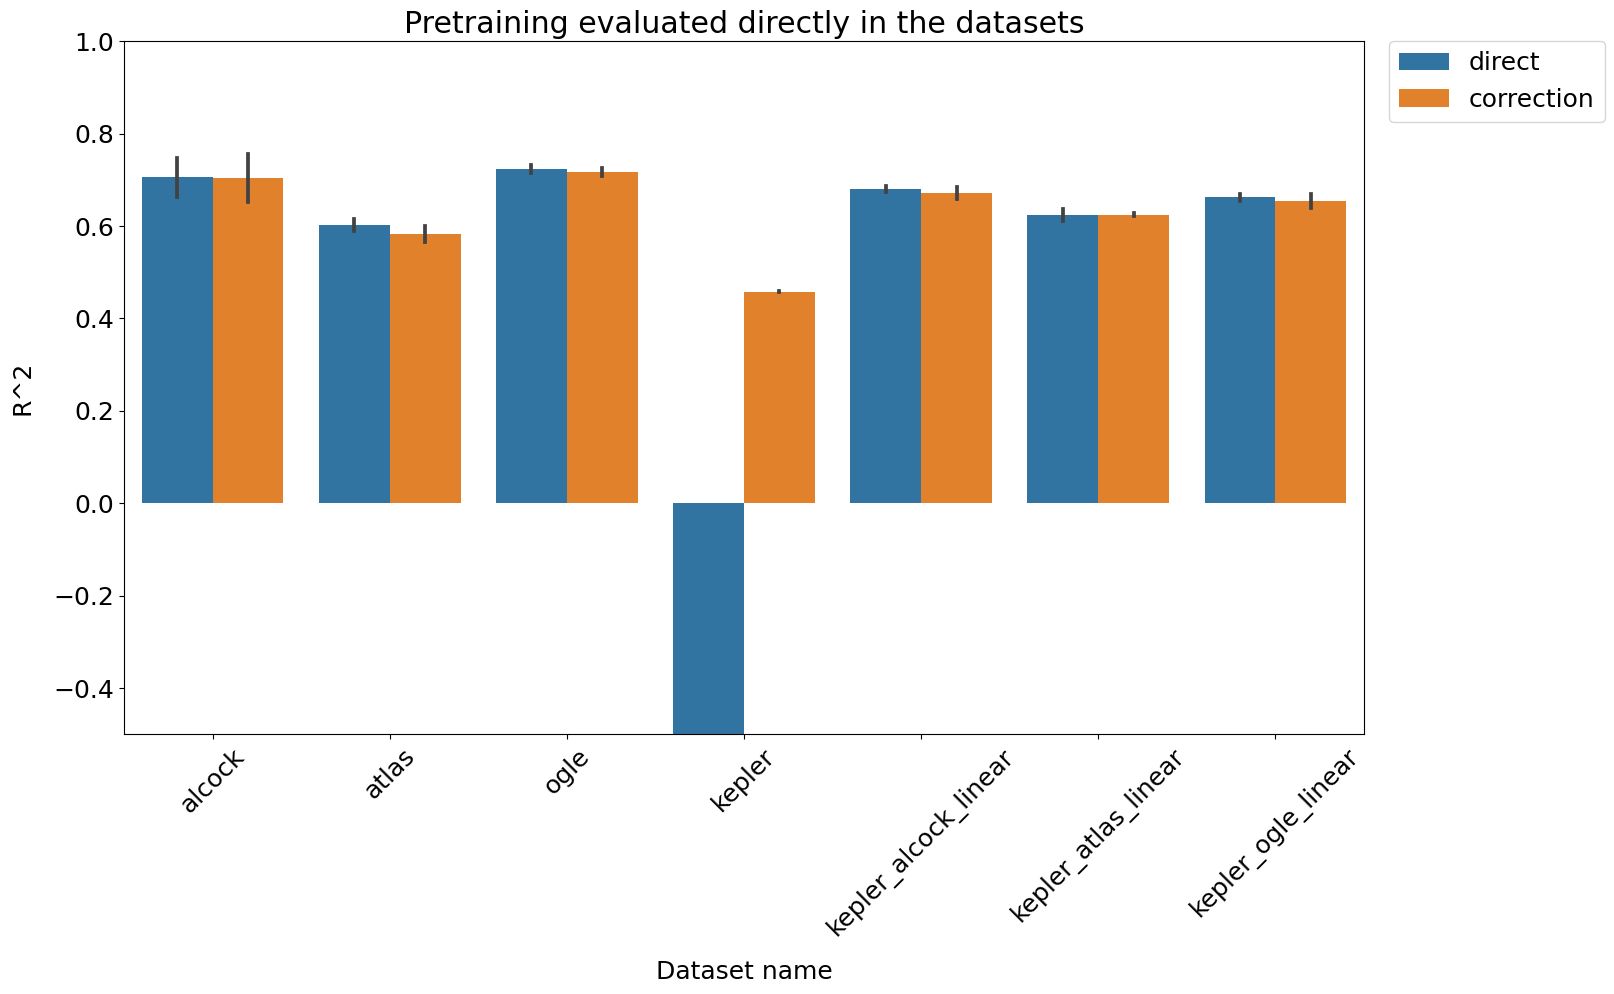

In [36]:
learning_rates = ['direct', 'correction']

df_results_pt = df_results[df_results['Learning rate'].isin(learning_rates)]

x = 'Dataset name'
y = 'R^2'
title = 'Pretraining evaluated directly in the datasets'.format(subsets[0])

from matplotlib import rcParams

# figure size in inches
rcParams['figure.figsize'] = 16, 9
rcParams.update({'font.size': 18})
rcParams['axes.labelpad'] = 14

bar_plot_ft(df_results_pt, x, y, title)

In [37]:
#ds_names = ['alcock', 'atlas', 'ogle', 'kepler', 'kepler_alcock_linear', 'kepler_atlas_linear', 'kepler_ogle_linear']
ds_names = ['alcock', 'atlas', 'ogle']

In [38]:
df_results_only_PE = df_results[df_results['Trainable layers'].isin(['Without FT', 'PE'])]

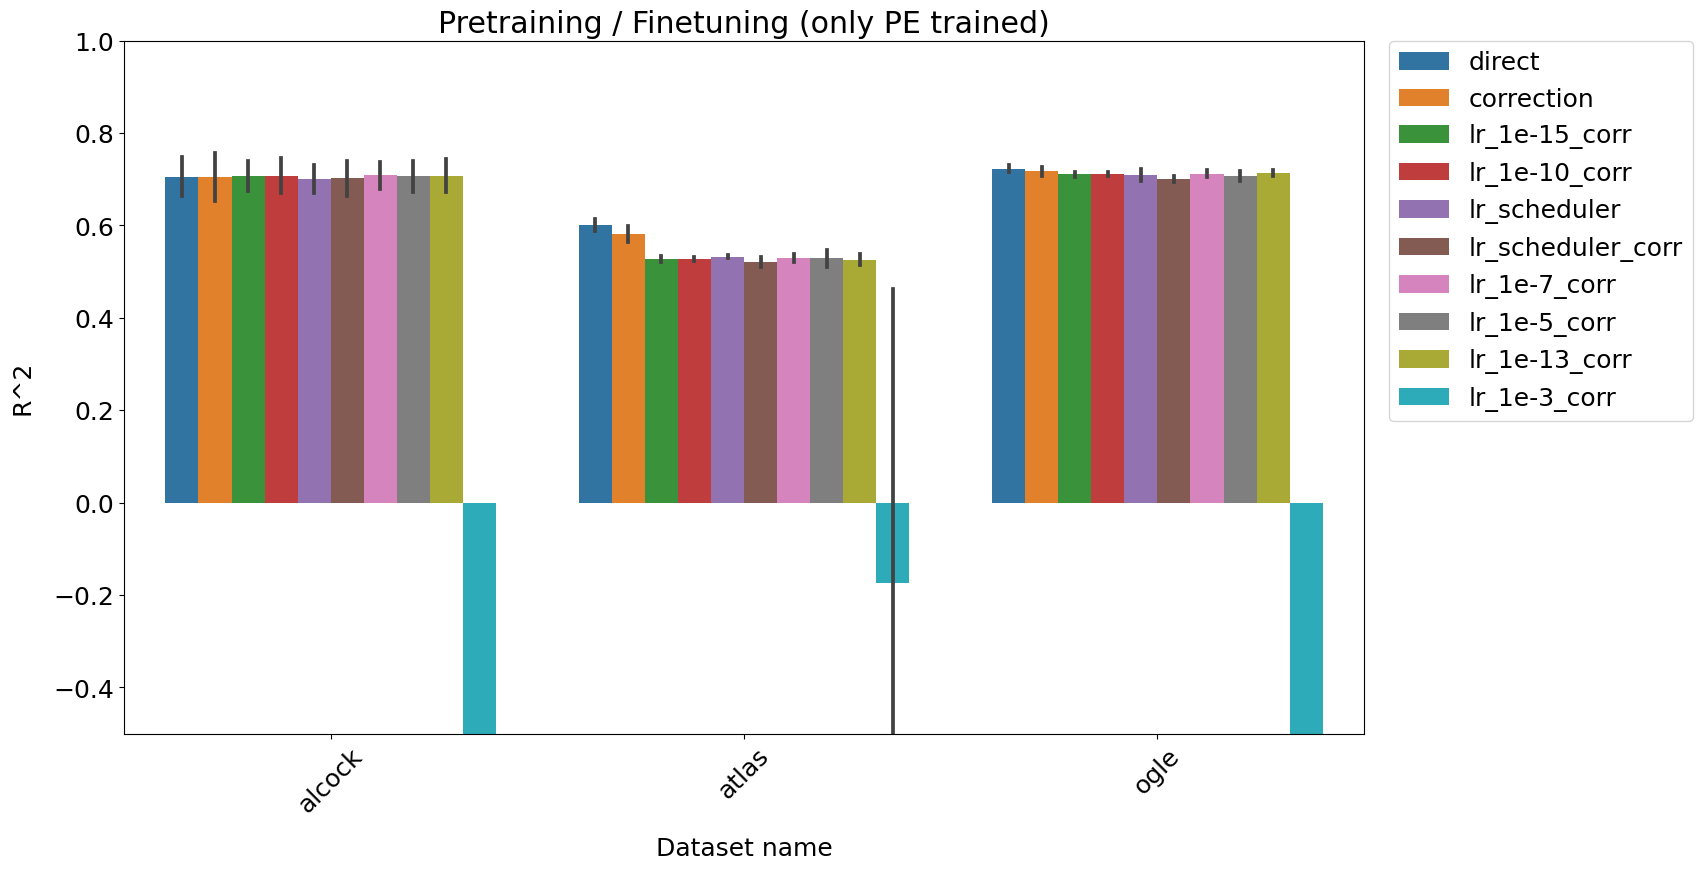

In [39]:
ds_names = ['alcock', 'atlas', 'ogle']

x = 'Dataset name'
y = 'R^2'
title = 'Pretraining / Finetuning (only PE trained)'.format(subsets[0])

from matplotlib import rcParams

# figure size in inches
rcParams['figure.figsize'] = 16, 9
rcParams.update({'font.size': 18})
rcParams['axes.labelpad'] = 14

bar_plot_ft(df_results_only_PE[df_results_only_PE['Dataset name'].isin(ds_names)], x, y, title)

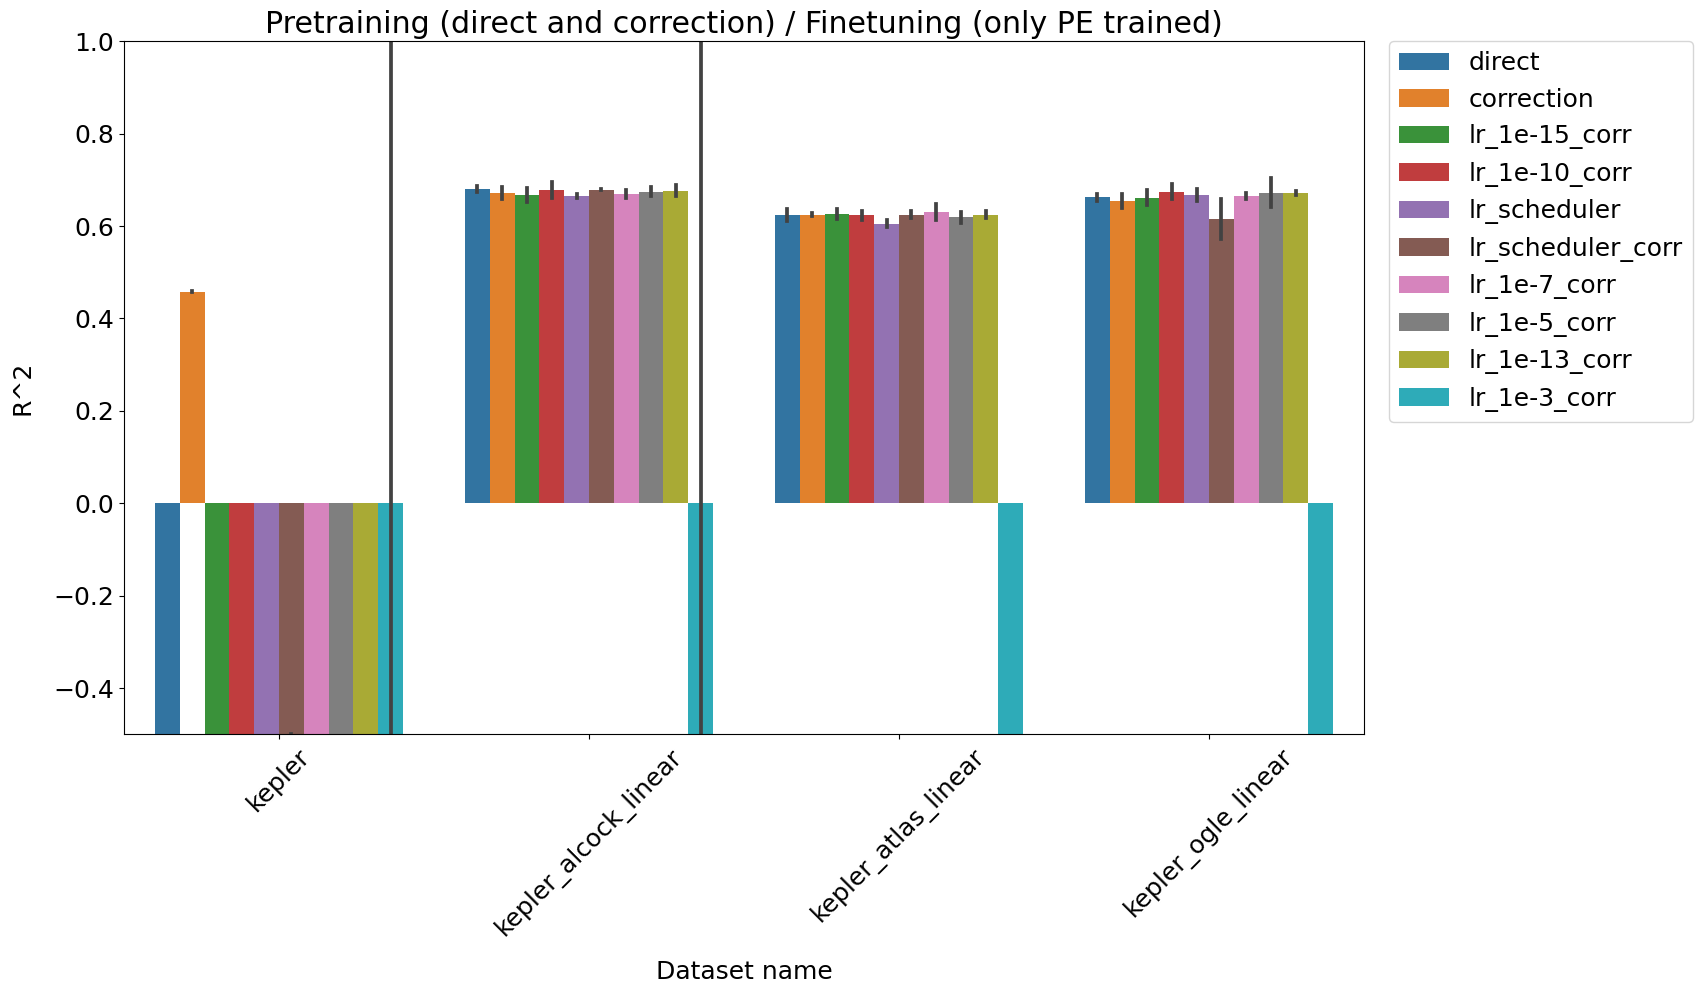

In [40]:
ds_names = ['kepler', 'kepler_alcock_linear', 'kepler_atlas_linear', 'kepler_ogle_linear']

x = 'Dataset name'
y = 'R^2'
title = 'Pretraining (direct and correction) / Finetuning (only PE trained)'.format(subsets[0])

from matplotlib import rcParams

# figure size in inches
rcParams['figure.figsize'] = 16, 9
rcParams.update({'font.size': 18})
rcParams['axes.labelpad'] = 14

bar_plot_ft(df_results_only_PE[df_results_only_PE['Dataset name'].isin(ds_names)], x, y, title)

In [41]:
def bar_plot(df, x, y, title):
  # who v/s fare barplot
  ax = sns.barplot(x = x,
                   y = y,
                   hue = 'Trainable layers',
                   data = df,
                   errorbar = 'sd').set(title=title)

  #place legend outside top right corner of plot
  plt.legend(bbox_to_anchor=(1.02, 1), loc='upper left', borderaxespad=0)
  plt.xticks(rotation=45)
  
  plt.ylim(-0.5, 1)

  # Show the plot
  plt.show()

In [42]:
df_results['Learning rate'].unique()

array(['direct', 'correction', 'lr_1e-15_corr', 'lr_1e-10_corr',
       'lr_scheduler', 'lr_scheduler_corr', 'lr_1e-7_corr',
       'lr_1e-5_corr', 'lr_1e-13_corr', 'lr_1e-3_corr'], dtype=object)

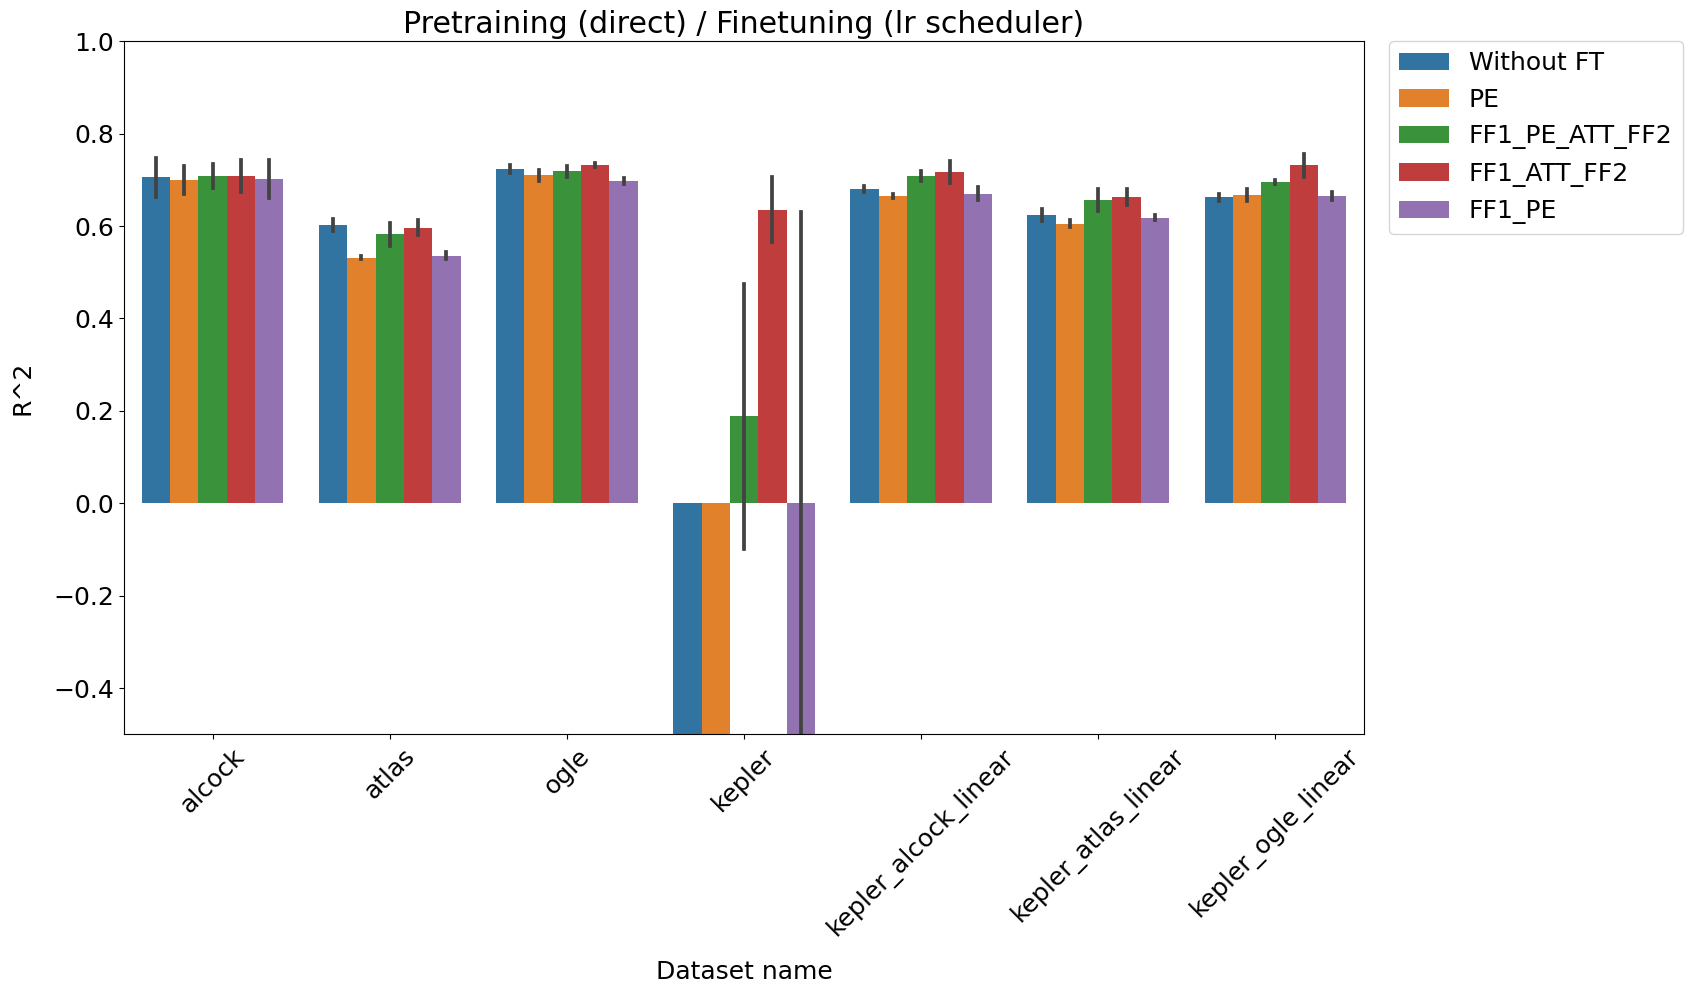

In [46]:
layers = ['direct', 'lr_scheduler'] #, 'lr_scheduler_corr'
df_results_all_ft = df_results[df_results['Learning rate'].isin(layers)]

#ds_names = ['alcock', 'atlas', 'ogle']

x = 'Dataset name'
y = 'R^2'
title = 'Pretraining (direct) / Finetuning (lr scheduler)'.format(subsets[0])

from matplotlib import rcParams

# figure size in inches
rcParams['figure.figsize'] = 16, 9
rcParams.update({'font.size': 18})
rcParams['axes.labelpad'] = 14

bar_plot(df_results_all_ft, x, y, title)

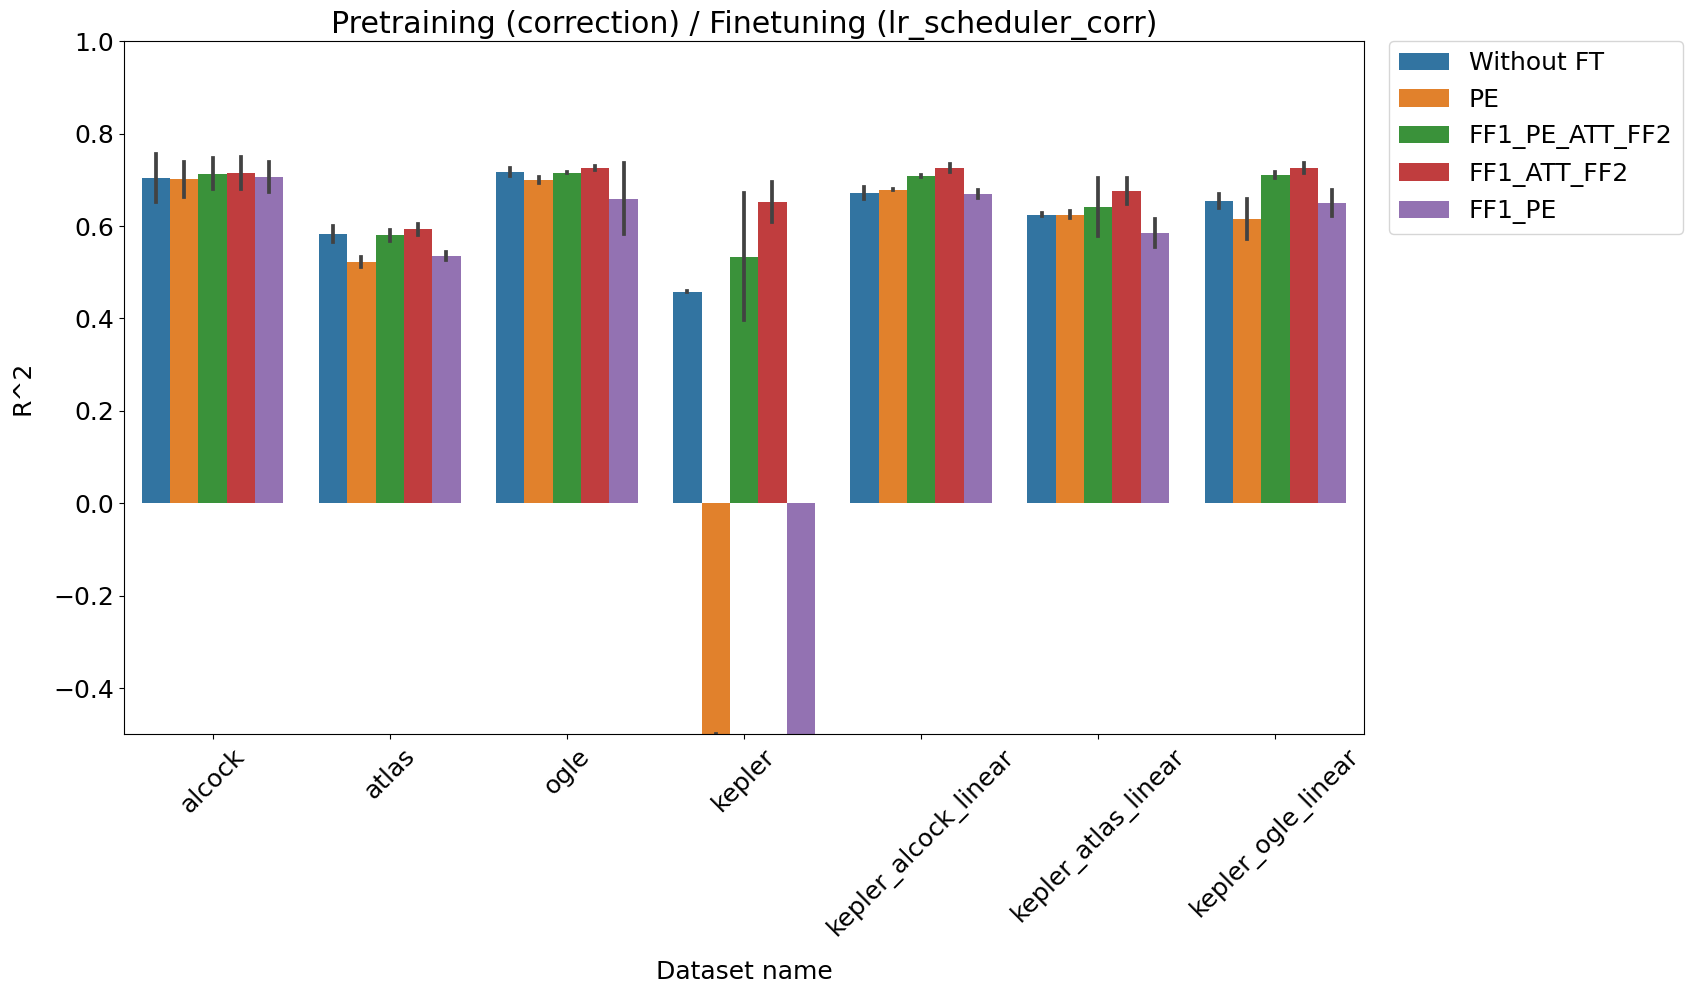

In [49]:
layers = ['correction', 'lr_scheduler_corr']
df_results_all_ft = df_results[df_results['Learning rate'].isin(layers)]

# ds_names = ['alcock', 'atlas', 'ogle']

x = 'Dataset name'
y = 'R^2'
title = 'Pretraining (correction) / Finetuning (lr_scheduler_corr)'.format(subsets[0])

from matplotlib import rcParams

# figure size in inches
rcParams['figure.figsize'] = 16, 9
rcParams.update({'font.size': 18})
rcParams['axes.labelpad'] = 14

bar_plot(df_results_all_ft, x, y, title)

## Pretraining evaluated directly in the datasets

In [75]:
df_results_filtered = df_results[df_results['Dataset name'] != 'ATLAS']
df_results_filtered

,Time Mean,Δ R^2 Mean,Δ RMSE Mean,Time Std,Δ R^2 Std,Δ RMSE Std,Dataset name,Trainable layers
0,91.066089,-0.001906,-0.000573,15.077792,0.004831,0.001698,ALCOCK,PE
1,256.629807,0.001123,0.000276,50.374743,0.003685,0.000873,ALCOCK,FF1_PE_ATT_FF2
2,174.979159,0.006132,0.000700,68.466115,0.000856,0.000906,ALCOCK,FF1_ATT_FF2
3,81.779074,-0.001386,0.000028,13.378001,0.001935,0.000783,ALCOCK,FF1_PE
8,349.037878,-0.002915,0.000979,43.793981,0.049844,0.001599,OGLE,PE
9,1092.578019,0.130629,0.008232,366.608726,0.004473,0.000225,OGLE,FF1_PE_ATT_FF2
10,981.372653,0.127116,0.007790,112.541414,0.005090,0.000266,OGLE,FF1_ATT_FF2
11,432.006693,0.042958,0.002641,121.378258,0.047326,0.001348,OGLE,FF1_PE


In [18]:
df_results_filtered = df_results.copy()

/home/users/dmoreno2016/miniconda3/lib/python3.11/site-packages/seaborn/_oldcore.py:1498: FutureWarning: is_categorical_dtype is deprecated and will be removed in a future version. Use isinstance(dtype, CategoricalDtype) instead
  if pd.api.types.is_categorical_dtype(vector):
/home/users/dmoreno2016/miniconda3/lib/python3.11/site-packages/seaborn/_oldcore.py:1498: FutureWarning: is_categorical_dtype is deprecated and will be removed in a future version. Use isinstance(dtype, CategoricalDtype) instead
  if pd.api.types.is_categorical_dtype(vector):
/home/users/dmoreno2016/miniconda3/lib/python3.11/site-packages/seaborn/_oldcore.py:1498: FutureWarning: is_categorical_dtype is deprecated and will be removed in a future version. Use isinstance(dtype, CategoricalDtype) instead
  if pd.api.types.is_categorical_dtype(vector):
/home/users/dmoreno2016/miniconda3/lib/python3.11/site-packages/seaborn/_oldcore.py:1498: FutureWarning: is_categorical_dtype is deprecated and will be removed in a futu

Text(0.5, 29.000000000000014, 'Training time')

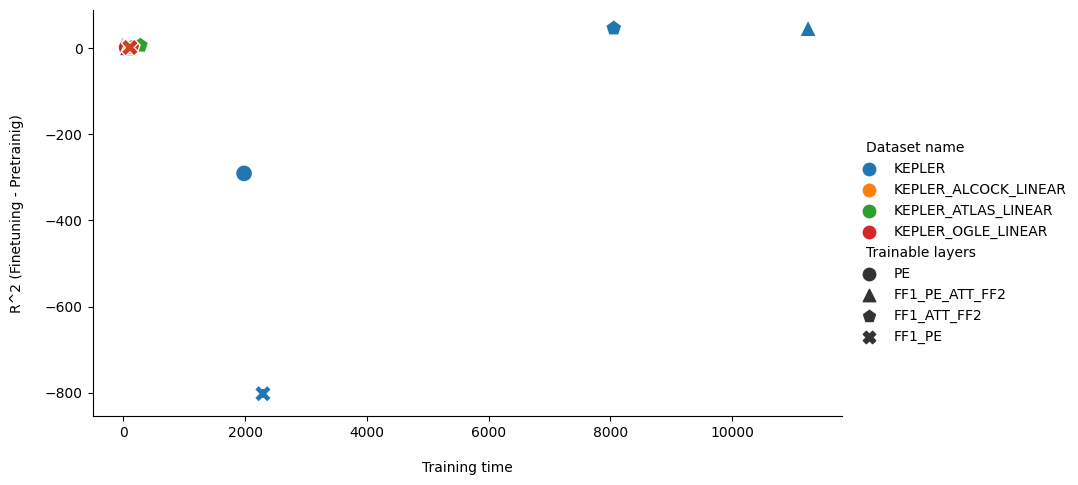

In [19]:
markers_set=['o', '^', 'p', 'X']


ax = sns.relplot(data=df_results_filtered, x='Time Mean', y=u'Δ R^2 Mean', hue='Dataset name', style='Trainable layers', s=150, height=4.8, aspect=1.8,
                 markers=markers_set)

markers, caps, bars = ax.ax.errorbar(df_results_filtered['Time Mean'], df_results_filtered[u'Δ R^2 Mean'],
                                     yerr=df_results_filtered[u'Δ R^2 Std'],
                                     #xerr=df_results['Time Std'],
                                     fmt='o',
                                     markersize=10,
                                     zorder=1, )

markers.set_markerfacecolor((1, 1, 0, 0.01))

for lh in ax._legend.legendHandles: 
    lh.set_alpha(1)
    lh._sizes = [80] 

plt.ylabel('R^2 (Finetuning - Pretrainig)', labelpad=15)
plt.xlabel('Training time', labelpad=15)